<a href="https://colab.research.google.com/github/faisalmoinuddin99/Automatic-Birthday-Wisher-via-SMS/blob/master/tabula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (168 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [2]:
!pip install pdf2image
!pip install easyocr

     |████████████████████████████████| 57.2MB 57kB/s 


In [3]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy
import cv2 


In [4]:
reader = easyocr.Reader(['en','mr'])

In [ ]:
images = convert_from_path('10_Satbara.pdf',    first_page=None, fmt="tiff")
from IPython.display import display, Image

display(images[0])    
images[0].save('10_Satbara.jpg', 'JPEG')

In [6]:
path = '10_Satbara.jpg'
img = cv2.imread(path)
print(img.shape)

(2200, 1709, 3)


In [7]:
width, height = 1403,1100

imgResize = cv2.resize(img,(width,height))
print(imgResize.shape)

(1100, 1403, 3)


In [8]:
from google.colab.patches import cv2_imshow

In [ ]:
cv2_imshow(img)

In [ ]:
cv2_imshow(imgResize)

**Cropping the Image Now**

In [113]:
# imgCropped = img[ 980:2200,0:1709]
imgCropped = img[ 513:1905,45:361]

In [ ]:
cv2_imshow(imgCropped)


In [121]:
cv2.imwrite('left-side.jpg', imgCropped)

True

In [ ]:
bounds = reader.readtext(np.array(imgCropped), contrast_ths=0.05, adjust_contrast=0.7, add_margin=0.45,  width_ths=0.8, decoder='beamsearch')
bounds

In [ ]:
def draw_boxes(image, bounds, color='red', width = 2):
  draw = ImageDraw.Draw(image)
  for bound in bounds:
    p0, p1, p2, p3 = bound[0]
    draw.line([*p0, *p1, *p2, *p3, *p0], fill = color, width= width)
  return image

draw_boxes(images[0], bounds)

In [ ]:
text = ''

for i in range(len(bounds)):
  text += bounds[i][1] + '\n'

print(text)

In [124]:
with open('left-side.txt', 'w', encoding='utf-8') as f:
  f.write(text)

In [125]:
contents = open("left-side.txt","r")
with open("left-side.html", "w") as e:
    for lines in contents.readlines():
        e.write("<pre>" + lines + "</pre> <br>\n")

**Top Header**

In [166]:
imgCropped = img[ 113:435,45:1500]

In [ ]:
cv2_imshow(imgCropped)

In [168]:
cv2.imwrite('top-side.jpg', imgCropped)

True

In [ ]:
bounds = reader.readtext(np.array(imgCropped), contrast_ths=0.05, adjust_contrast=0.7, add_margin=0.45,  width_ths=0.8, decoder='beamsearch')
bounds

In [ ]:
text = ''

for i in range(len(bounds)):
  text += bounds[i][1] + '\n'

print(text)

In [173]:
with open('top-side.txt', 'w', encoding='utf-8') as f:
  f.write(text)

In [174]:
contents = open("top-side.txt","r")
with open("top-side.html", "w") as e:
    for lines in contents.readlines():
        e.write("<pre>" + lines + "</pre> <br>\n")

**Center-side**

In [225]:
imgCropped = img[ 513:1905,360:1197]


In [ ]:
cv2_imshow(imgCropped)


In [226]:
cv2.imwrite('center-side.jpg', imgCropped)

True

In [ ]:
bounds = reader.readtext(np.array(imgCropped), contrast_ths=0.05, adjust_contrast=0.7, add_margin=0.45,  width_ths=0.8, decoder='beamsearch')
bounds

In [ ]:
text = ''

for i in range(len(bounds)):
  text += bounds[i][1] + '\n'

print(text)

In [229]:
with open('center-side.txt', 'w', encoding='utf-8') as f:
  f.write(text)

In [230]:
contents = open("center-side.txt","r")
with open("center-side.html", "w") as e:
    for lines in contents.readlines():
        e.write("<pre>" + lines + "</pre> <br>\n")

**Right-side**

In [261]:
 imgCropped = img[ 513:1905,1193:1580]

In [ ]:
cv2_imshow(imgCropped)

In [263]:
cv2.imwrite('right-side.jpg', imgCropped)

True

In [ ]:
bounds = reader.readtext(np.array(imgCropped), contrast_ths=0.05, adjust_contrast=0.7, add_margin=0.45,  width_ths=0.8, decoder='beamsearch')
bounds

In [ ]:
text = ''

for i in range(len(bounds)):
  text += bounds[i][1] + '\n'

print(text)

In [266]:
with open('right-side.txt', 'w', encoding='utf-8') as f:
  f.write(text)

In [267]:
contents = open("right-side.txt","r")
with open("right-side.html", "w") as e:
    for lines in contents.readlines():
        e.write("<pre>" + lines + "</pre> <br>\n")

***Middle-Header***

In [320]:
imgCropped = img[ 430:516,45:1582]

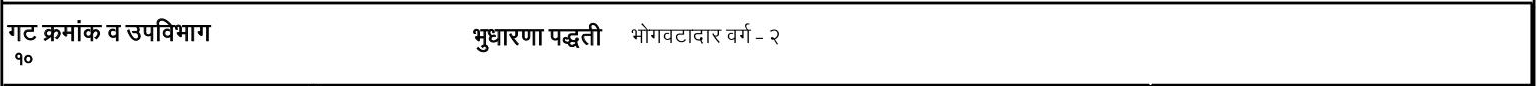

In [321]:
cv2_imshow(imgCropped)

In [322]:
cv2.imwrite('middle-header.jpg', imgCropped)

True

In [ ]:
bounds = reader.readtext(np.array(imgCropped), contrast_ths=0.05, adjust_contrast=0.7, add_margin=0.45,  width_ths=0.8, decoder='beamsearch')
bounds

In [324]:
text = ''

for i in range(len(bounds)):
  text += bounds[i][1] + '\n'

print(text)

गट क्रमांक व उपविभाग
T पद्घती
भोगवटादार वर्ग - २
भुधारणा फ
१०



In [325]:
with open('middle-header.txt', 'w', encoding='utf-8') as f:
  f.write(text)

In [326]:
contents = open("middle-header.txt","r")
with open("middle-header.html", "w") as e:
    for lines in contents.readlines():
        e.write("<pre>" + lines + "</pre> <br>\n")